# Netflix Movie and Series Recommendation System

## Introduction
The Netflix Movie and Series Recommendation System is a project designed to recommend both movies and series based on the available dataset from Netflix up to 2021. This system leverages different recommendation algorithms to provide personalized suggestions for users looking to explore new content on Netflix.

## Objective
The primary objective of this project is to develop a recommendation system that can suggest relevant movies and series based on user preferences. By utilizing content-based filtering techniques and analyzing various features from the dataset, the system aims to enhance user experience by offering tailored recommendations.

## Datasets
1. **Netflix Dataset**: Contains comprehensive information about movies and series available on Netflix until 2021. Key features include titles, descriptions, cast, director, and genre.
2. **IMDb Dataset**:
   - `IMDb ratings.csv`: Includes IMDb ratings data.
   - `IMDb movies.csv`: Contains information about movie titles, years, and genres.

## Methodology
1. **Data Preprocessing**: 
   - Clean and preprocess the Netflix dataset by handling missing values and converting text features to a uniform format.
   - Use TF-IDF Vectorizer for analyzing movie descriptions to compute cosine similarity and generate recommendations.
   - Implement content-based filtering on multiple features including title, director, cast, genre, and description to refine recommendations.

2. **Recommendation Algorithms**:
   - **Content-Based Recommendation System**: Utilizes TF-IDF Vectorizer to analyze movie descriptions and compute cosine similarity for generating recommendations based on the content similarity.
   - **Content-Based Filtering on Multiple Metrics**: Combines various features from the dataset into a "soup" of words, which is then analyzed using Count Vectorizer to compute cosine similarity and provide recommendations based on multiple features.

3. **Deployment**: 
   - The recommendation system is deployed using Streamlit, allowing users to interact with the system via a web interface. The deployment script is included in the repository.

## Conclusion
This project demonstrates the effectiveness of content-based filtering techniques for building a recommendation system tailored to both movies and series. By analyzing various features from the Netflix dataset and incorporating additional IMDb data, the system provides users with relevant suggestions. For practical use, the system has been deployed using Streamlit, and a file with the Streamlit deployment code is attached in the repository.

## Additional Information
There is also a file attached in the repository where the recommendation system is deployed using Streamlit, allowing users to interact with the system through a web interface.

---

Author - *Rajarshi Das*

This notebook demonstrates how to build a content-based movie recommender system using various features like title, director, cast, genre, and description. Additionally, it integrates the OMDb API to fetch movie details and posters, displaying them through a Streamlit app.

### Introduction

Welcome to the project, where we explore and implement movie series recommendation systems using a variety of techniques. The goal of this project is to create effective recommendation engines that suggest movies and series based on user preferences and content characteristics. We start by introducing and analyzing the datasets, which include IMDb ratings and movie metadata. This data forms the foundation for our recommendation systems.

We then dive into two primary approaches to recommendation:

1. **Content-Based Recommendation System**: This method leverages textual information from movie descriptions to recommend similar content. We use TF-IDF Vectorizer to transform descriptions into numerical representations and compute cosine similarity to find and recommend movies that closely match the provided title.

2. **Content-Based Filtering on Multiple Metrics**: In this advanced approach, we enhance our recommendations by considering a combination of features, including title, director, cast, genre, and description. By creating a comprehensive "soup" of words from these features and applying Count Vectorizer, we compute cosine similarity to identify movies with similar attributes.

Throughout this notebook, we demonstrate the implementation and evaluation of these recommendation systems, providing practical examples and insights into their effectiveness. This notebook serves as a comprehensive guide to building and refining content-based recommendation systems, with the ultimate aim of improving user experience through personalized movie suggestions.

### 1. Import Libraries and Load Data
In this step, we import the necessary libraries for data manipulation, visualization, and text processing. We also load the Netflix dataset, which contains details about movies and TV shows available on the platform.

In [3]:
# Importing all essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Set configurations
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
# Loading the dataset
netflix = pd.read_csv('netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 2. Data Analysis and Visualization
In this step, we perform exploratory data analysis (EDA) to understand the distribution and patterns in the data. We visualize the distribution of different genres, the number of movies and TV shows, and generate word clouds for descriptions.

In [6]:
# Display the first few rows of the dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
# Checking the shape of the dataset
netflix.shape

(8807, 12)

In [9]:
# Checking the count of non-null values in each column
netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [61]:
# Get information about the dataset
print(netflix.info())

# Describe numerical columns
print(netflix.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [62]:
# Check for missing values
print(netflix.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [63]:
# Check data types of columns
print(netflix.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [69]:
# Unique values in 'type' column
print(netflix['type'].unique())

# Unique values in 'rating' column
print(netflix['rating'].unique())

# Unique values in 'director' column
print(netflix['director'].unique())

# Unique values in 'cast' column
print(netflix['cast'].unique())

# Unique values in 'country' column
print(netflix['country'].unique())

# Unique values in 'listed_in' column
print(netflix['listed_in'].unique())


['Movie' 'TV Show']
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
[nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chau

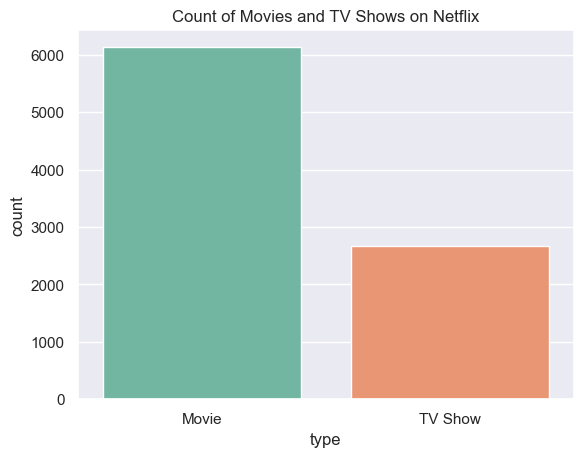

In [11]:
# Separating Movies and TV Shows
netflix_shows = netflix[netflix['type'] == 'TV Show']
netflix_movies = netflix[netflix['type'] == 'Movie']

# Visualization: Show vs Movies
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')
plt.title('Count of Movies and TV Shows on Netflix')
plt.show()

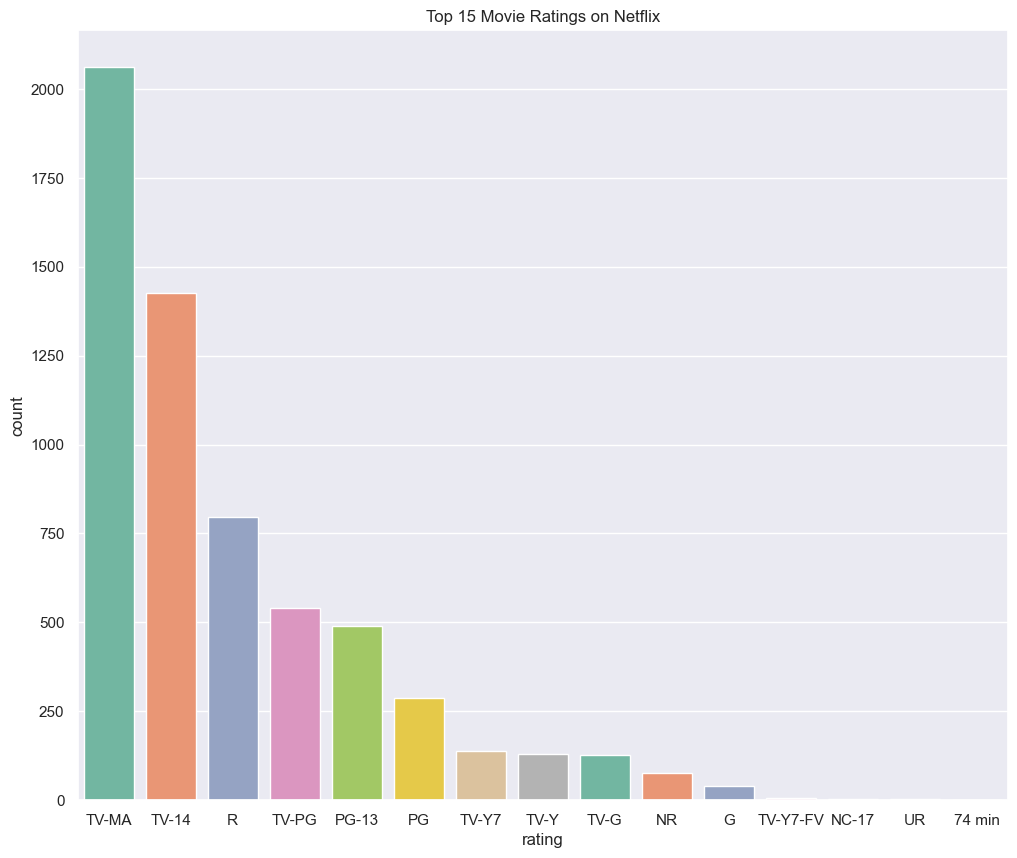

In [12]:
# Movie Ratings Analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])
plt.title('Top 15 Movie Ratings on Netflix')
plt.show()

In [22]:
data = pd.read_csv('IMDb movies.csv')
data

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


In this project, we utilize two main datasets from IMDb to enhance our movie recommendation system:

- IMDb Ratings Dataset: This dataset contains various ratings for movies, including a key column called weighted_average_vote, which represents the weighted average rating of each movie. This metric is particularly useful for providing a more accurate measure of a movie's popularity and quality based on user reviews.
- IMDb Movies Dataset: This dataset provides detailed information about movies, including their title, year, and genre. These attributes help in categorizing and filtering movies, making it easier to provide recommendations based on specific criteria such as release year or genre.

These datasets together enable us to enrich our recommendation system by incorporating both user ratings and detailed movie attributes, thereby enhancing the relevance and accuracy of the recommendations provided.

In [13]:
# IMDB ratings data
imdb_ratings = pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])

In [14]:
imdb_ratings.head()

,weighted_average_vote
0,5.9
1,6.1
2,5.8
3,5.2
4,7.0


In [15]:
imdb_titles.head()

,title,year,genre
0,Miss Jerry,1894,Romance
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama"
2,Den sorte drøm,1911,Drama
3,Cleopatra,1912,"Drama, History"
4,L'Inferno,1911,"Adventure, Drama, Fantasy"


In [16]:
# Merging both IMDB data
ratings = pd.DataFrame({
    'Title': imdb_titles.title,
    'Release Year': imdb_titles.year,
    'Rating': imdb_ratings.weighted_average_vote,
    'Genre': imdb_titles.genre
})
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)

In [17]:
ratings.head()

,Title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"


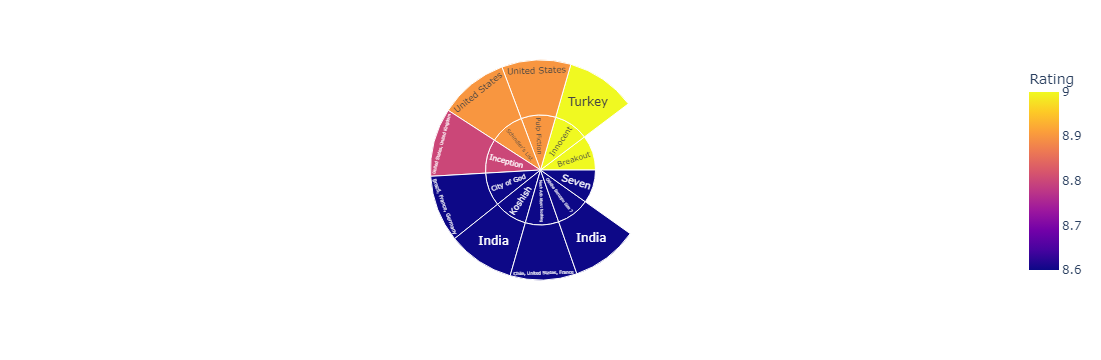

In [18]:
# Joining the datasets
joint_data = ratings.merge(netflix, left_on='Title', right_on='title', how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

# Visualization: Top rated movies on Netflix
top_rated = joint_data.head(10)
fig = px.sunburst(top_rated, path=['title', 'country'], values='Rating', color='Rating')
fig.show()

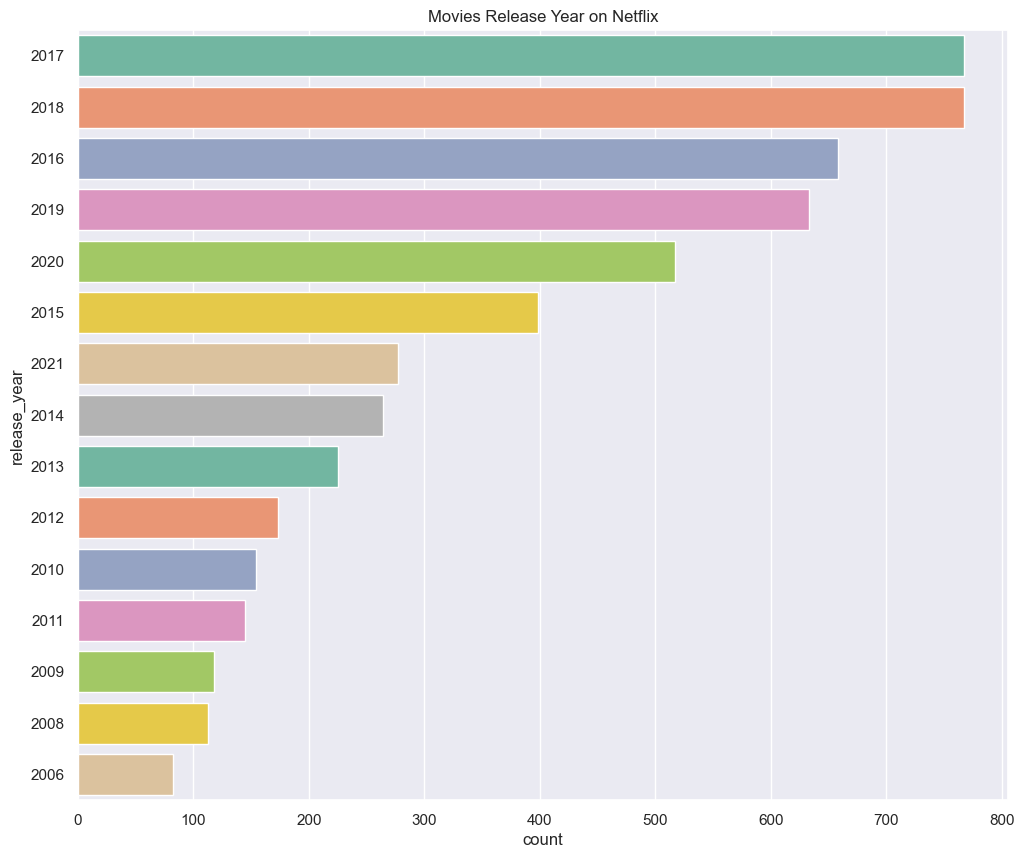

In [23]:
# Visualization: Movies release year analysis
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:15])
plt.title('Movies Release Year on Netflix')
plt.show()

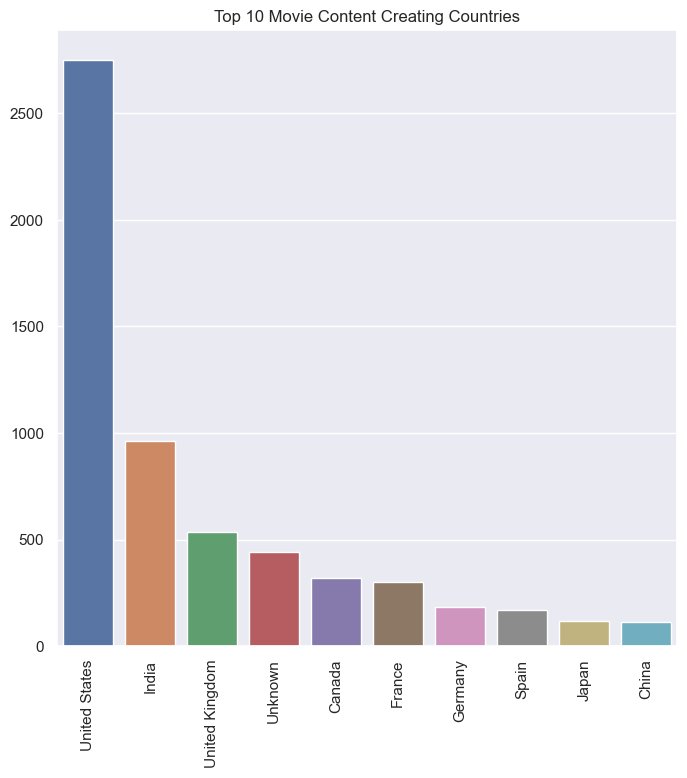

In [24]:
# Visualization: Top 10 movie content creating countries
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')
countries = netflix_movies['country'].str.split(',', expand=True).stack().str.strip().value_counts()
top_countries = countries.head(10)
plt.figure(figsize=(8,8))
ax = sns.barplot(x=top_countries.index, y=top_countries.values)
ax.set_xticklabels(top_countries.index, rotation=90)
plt.title('Top 10 Movie Content Creating Countries')
plt.show()

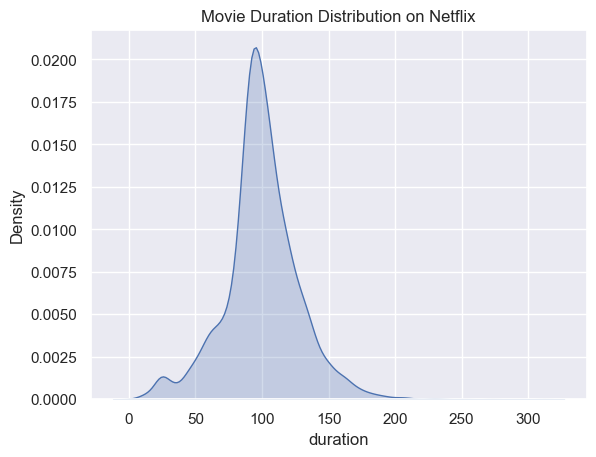

In [25]:
# Visualization: Movie duration analysis
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(float)
sns.set(style='darkgrid')
sns.kdeplot(netflix_movies['duration'], shade=True)
plt.title('Movie Duration Distribution on Netflix')
plt.show()

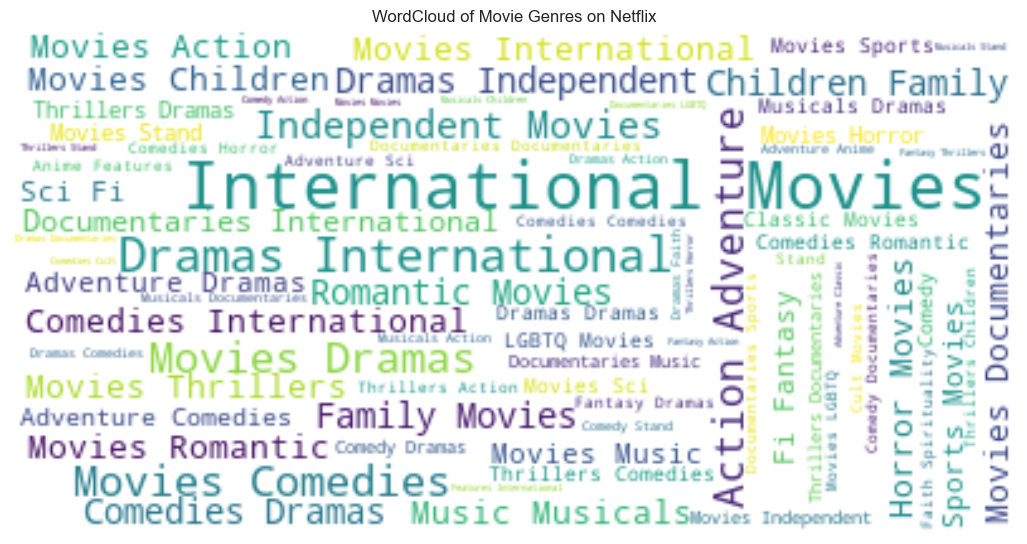

In [26]:
# WordCloud for Genres
genres = netflix_movies['listed_in'].str.split(',', expand=True).stack().str.strip().tolist()
wordcloud = WordCloud(max_words=1000000, background_color="white").generate(" ".join(genres))
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('WordCloud of Movie Genres on Netflix')
plt.show()

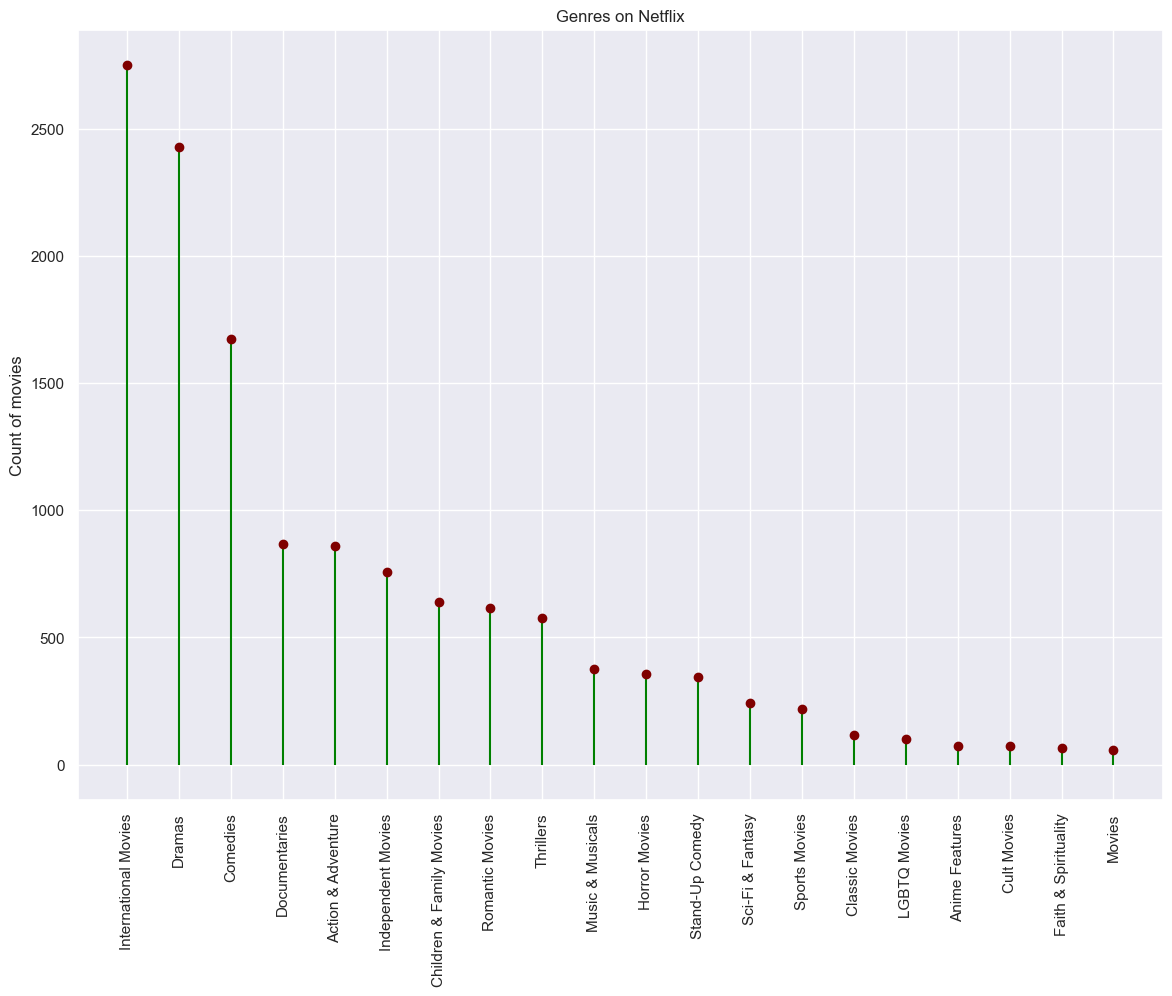

In [27]:
# Lollipop chart of genres vs their count on Netflix
genre_counts = Counter(genres)
genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}
fig, ax = plt.subplots(figsize=(14, 10))
ax.vlines(x=list(genre_counts.keys()), ymin=0, ymax=list(genre_counts.values()), color='green')
ax.plot(list(genre_counts.keys()), list(genre_counts.values()), "o", color='maroon')
ax.set_xticklabels(list(genre_counts.keys()), rotation=90)
ax.set_ylabel("Count of movies")
ax.set_title("Genres on Netflix")
plt.show()

### 3. Content-based Recommendation System
In this section, we develop a content-based recommendation system using the TF-IDF vectorizer to analyze the descriptions of movies and TV shows. We start by initializing a TF-IDF vectorizer configured to ignore English stop words and convert the descriptions into numerical vectors. Next, we compute the cosine similarity matrix from these vectors to determine the similarity between different movies or TV shows based on their descriptions. A function, `get_recommendation`, is defined to take a movie title as input and return a list of similar movies. This function finds the index of the given title, retrieves similarity scores for all movies, sorts these scores in descending order, and returns the top 10 most similar movies as recommendations. We demonstrate the use of this recommendation function with an example, providing recommendations for the TV show "Peaky Blinders." This content-based recommendation system helps users discover similar content based on textual descriptions, aligning with their interests and preferences.

In [47]:
# Content-based Recommendation System
# Using TF-IDF Vectorizer for descriptions
tfidf = TfidfVectorizer(stop_words='english')
netflix['description'] = netflix['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix['description'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()

In [48]:
# Function to get recommendations based on title
def get_recommendation(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix['title'].iloc[movie_indices]

In [49]:
# Example recommendations
print(get_recommendation('Peaky Blinders'))

7683                    Our Godfather
2646                   My Stupid Boss
3133                              Don
8293                         The Fear
7140    Jonathan Strange & Mr Norrell
7785                Power Rangers Zeo
8467                       The Prison
8539                       The Tudors
1510                    The Con Is On
8391     The Legend of Michael Mishra
Name: title, dtype: object


In [50]:
print(get_recommendation('Friends'))

7397        Manhattan Romance
3369          BoJack Horseman
964       Things Heard & Seen
5090                 Episodes
4096                Studio 54
6549               Dad's Army
4964        Trailer Park Boys
4265     Single Ladies Senior
682     Why Are You Like This
2403                   Menahi
Name: title, dtype: object


In [51]:
print(get_recommendation('Narcos'))

7463                          Miss Dynamite
6673                            El Cartel 2
2921                         Narcos: Mexico
4750                               El Chapo
310     Cocaine Cowboys: The Kings of Miami
1268                   El final del paraíso
5822                                Cocaine
3425                            Street Flow
4456                         Raja Natwarlal
2                                 Ganglands
Name: title, dtype: object


In [52]:
print(get_recommendation('Breaking Bad'))

1920              The Book of Sun
1798                 Alice Junior
4118                  Iron Ladies
6616                    Dismissed
2388                Alexa & Katie
1237                     Mariposa
8303              The Five Venoms
2491       The School of Mischief
1559    The Mess You Leave Behind
1022             Taare Zameen Par
Name: title, dtype: object


### 4. Content-based Filtering on Multiple Metrics

In this section, we enhance the content-based recommendation system by incorporating multiple features for more nuanced recommendations. We first preprocess the dataset by filling missing values and applying text normalization to various features, including title, director, cast, listed genres, and description. A "soup" of words is created by concatenating these features into a single text string for each entry. This concatenated text is then vectorized using a Count Vectorizer to transform the textual data into numerical form. The cosine similarity matrix is computed from these vectors to measure the similarity between movies based on the combined features. A new recommendation function, `get_recommendation_new`, is introduced to take a movie title, calculate similarity scores, and return the top 10 most similar movies. This method provides recommendations by considering multiple attributes of each movie, offering a more comprehensive approach to content-based filtering. For example, recommendations for the TV show "Peaky Blinders" are generated, showcasing how the system identifies similar content based on a broader set of features.

In [54]:
# Content-based filtering on multiple metrics
filledna = netflix.fillna('')
def clean_data(x):
    return str.lower(x.replace(" ", ""))

# Features for filtering
features = ['title', 'director', 'cast', 'listed_in', 'description']
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)

# Create a "soup" or a "bag of words"
def create_soup(x):
    return x['title'] + ' ' + x['director'] + ' ' + x['cast'] + ' ' + x['listed_in'] + ' ' + x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

# Using Count Vectorizer for the "soup"
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

# Compute the cosine similarity matrix for the "soup"
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
filledna = filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [55]:
# Function to get recommendations based on multiple features
def get_recommendation_new(title, cosine_sim=cosine_sim2):
    title = title.replace(' ', '').lower()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix['title'].iloc[movie_indices]

In [56]:
# Example recommendations with the improved model
print(get_recommendation_new('Peaky Blinders', cosine_sim2))

3034                    Giri / Haji
5032    The Frankenstein Chronicles
8431          The Murder Detectives
4951                         Loaded
4809                  Kiss Me First
6922                   Happy Valley
2184                       Get Even
519                   I AM A KILLER
3789                 Killer Ratings
4476          Terrorism Close Calls
Name: title, dtype: object


In [40]:
print(get_recommendation_new('Friends', cosine_sim2))

5090                               Episodes
6795                                Frasier
8189                 The Andy Griffith Show
6549                             Dad's Army
7721                    Pee-wee's Playhouse
8599                        Toast of London
6456                                 Cheers
8541    The Twilight Zone (Original Series)
1929                        Man with a Plan
1480                             Still Game
Name: title, dtype: object


In [41]:
print(get_recommendation_new('Narcos', cosine_sim2))

2921            Narcos: Mexico
2415        Queen of the South
4655        Marvel's Iron Fist
3725                   Shooter
7729        Person of Interest
3752    Marvel's Jessica Jones
4752                   Smoking
2874            Altered Carbon
3298             Wild District
5046                     Valor
Name: title, dtype: object


In [42]:
print(get_recommendation_new('Breaking Bad', cosine_sim2))

2931                       Better Call Saul
678     The Assassination of Gianni Versace
1980                          The Blacklist
2767                                  Ozark
1477                                Dare Me
3762                    Designated Survivor
8397           The Lizzie Borden Chronicles
4079                               Unsolved
3684                              Kakegurui
3604                               Sintonia
Name: title, dtype: object


### Conclusion

In this notebook, we have explored and implemented two distinct approaches for building a movie recommender system: a content-based recommendation system using TF-IDF vectorization and an advanced content-based filtering method utilizing multiple features and a bag of words approach. These methods offer valuable insights and practical solutions for recommending movies based on user preferences. Additionally, there is a file attached in the repository where the recommender system is deployed using Streamlit, providing a user-friendly interface for real-time recommendations.

By `Rajarshi Das`